## **시계열 데이터**
- 일정 시간 간격으로 특정 값을 기록한 데이터

### 1. Datetime 오브젝트
- 날짜(date, time, datetime) 처리 라이브러리
- Datetime 오브젝트로 변환하기 : **to_datetime()** | 문자열은 시간 계산 불가능
- **시간 형식 지정자** p245 참조
- Datetime 오브젝트로 변환하기 : **read_csv()**
- Datetime 오브젝트에서 날짜 정보 추출 : day, month, year
- **dt 접근자** : str 접근자처럼, dt를 사용하면 datetime 시계열 데이터를 처리할 수 있음

### 2. 사례별 시계열 데이터 계산하기


In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2024-03-27 00:38:45.023280
2024-03-27 00:38:45.024280


In [3]:
# datetime 오브젝트 생성 시 시간 직접 입력
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24,34)
print(t1)
print(t2)
print(t3)

2024-03-27 00:38:45.067327
1970-01-01 00:00:00
1970-12-12 13:24:34


In [4]:
# datetime object는 시간 계산 가능
diff1 = t1 - t2
print(diff1)
diff2 = t2 - t1
print(type(diff2))

19809 days, 0:38:45.067327
<class 'datetime.timedelta'>


In [5]:
# 문자열을 datetime 오브젝트로 변환하기
import pandas as pd
import os 
ebola = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/country_timeseries.csv')

print(ebola.info())
# object(문자열로 지정된) date 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [6]:
ebola['date_dt'] = pd.to_datetime(ebola['Date']) # 문자열 -> 날짜
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [7]:
# to_datetime()을 더 자세히
test_df1 = pd.DataFrame({'order_day' : 
                         ['01/01/15', '02/01/15', '03/01/15']})
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)
test_df2 = pd.DataFrame({'order_day' : 
                         ['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'],
                                     format='%d-%m-%y')
print(test_df2)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15
  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


In [8]:
# 시계열 데이터 구분 추출 (일부 추출)
now = datetime.now()
print(now)

nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H-%M-%S')
print(nowTime)

nowDateTime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDateTime)

2024-03-27 00:38:45.795688
2024-03-27
00-38-45
2024-03-27 00:38:45


In [9]:
# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기
ebola1 = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/country_timeseries.csv',
                     parse_dates = ['Date'])
print(ebola1.info()) # date열이 문자열이 아닌 datetime()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [10]:
# 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

# datetime 오브젝트의 year, month, day 속성을 이용해 년, 월, 일 추출
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]
2018
5
16


In [11]:
# dt 접근자로 시계열 데이터 정리하기
ebola['date_dt'] = pd.to_datetime(ebola['Date']) # date -> datetime으로 변환

# dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출
print(ebola[['Date', 'date_dt']].head())
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [12]:
# dt 접근자를 사용하지 않고 접근하는 것은 특정 데이터를 인덱스로 접근하므로 불편.
# dt 접근자로 date_dt에 한 번에 접근
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [13]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [14]:
# 12-2 에볼라 최초 발병일 계산하기
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [15]:
# min 메서드로 에볼라의 최초 발병일 찾기
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
# date - 최초 발병일 = 에볼라의 진행 정도
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [17]:
# 파산한 은행의 개수 계산
banks = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [18]:
banks_no_dates = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [19]:
banks = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/banklist.csv',
                   parse_dates = [5,6])
print(banks.info())

C:\Users\gyw78\AppData\Local\Temp\ipykernel_11508\2775210052.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/banklist.csv',
C:\Users\gyw78\AppData\Local\Temp\ipykernel_11508\2775210052.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/banklist.csv',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [20]:
# 은행이 파산한 분기 (dt 접근자, quarter 속성)
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

In [21]:
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [22]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [23]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

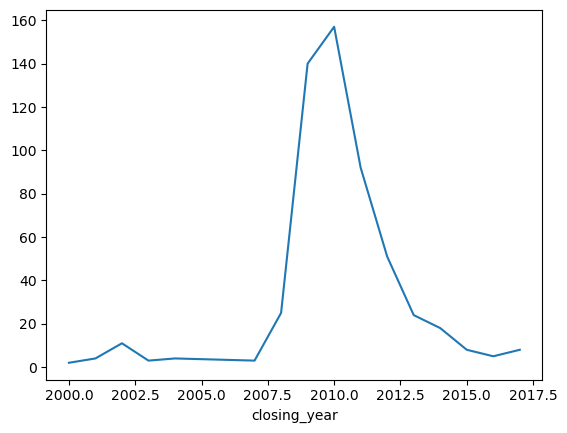

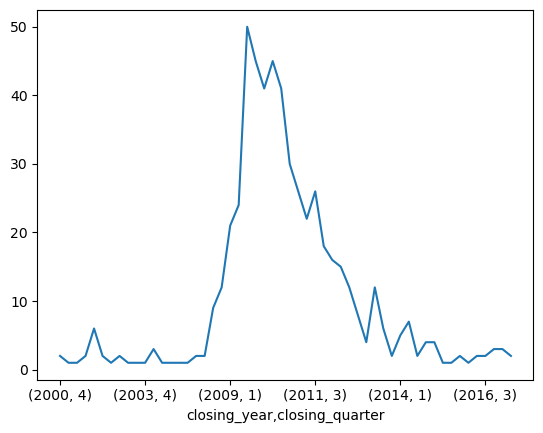

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

### 테슬라 주식 데이터로 시간 계산하기

In [25]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [26]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

# tesla에는 데이터 프레임이 저장됩니다.
tesla = pdr.get_data_quandl('TSLA', api_key = '받은 key')

# tesla에 저장된 데이터프레임을 파일로 저장합니다
tesla.to_csv('C:/Users/gyw789/Desktop/ewha/3-1/esaa/tesla_stock_quandl.csv')

RemoteDataError: Unable to read URL: https://www.quandl.com/api/v3/datasets/WIKI/TSLA.csv?start_date=2019-03-29&end_date=2024-03-27&order=asc&api_key=받은 key
Response Text:
b'code,message\nQEAx01,We could not recognize your API key: \xeb\xb0\x9b\xec\x9d\x80 key. Please check your API key and try again. You can find your API key under your account settings.\n'

In [ ]:
print(tesla.head())

In [ ]:
tesla = pd.read_csv('C:/Users/gyw789/Desktop/ewha/3-1/esaa/tesla_stock_quandl.csv',
                   parse_dates=[0])
print(telsa.info())

In [ ]:
print(tesla.loc[(tesla.Date.dt.year == 2010) &
      (tesla.Date.dt.month == 6)])

datetime object와 인덱스 

In [ ]:
print(tesla.head())

In [ ]:
tesla = pd.read_csv('C:/Users/gyw789/Deskto/ewha/3-1/esaa/tesla_stock_quandl.csv',
                   parse_dates = [0])
print(tesla.info())

In [ ]:
print(tesla.loc[(tesla.Date.dt.year == 2010) &
      (tesla.Date.dt.month == 6)])

### datetime 오브젝트와 인덱스 -Datetimeindex

In [ ]:
tesla.index = tesla['Date']
print(tesla.index)

In [ ]:
print(tesla['2015'].iloc[:5, :5])

In [ ]:
print(tesla['2010-06'].iloc[:,:5])

### 시간 간격과 인덱스 - Timedeltaindex

In [ ]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

In [ ]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5,:5])

In [ ]:
print(tesla['5 days' :].iloc[:5, :5])

### 시간 범위와 인덱스

In [ ]:
ebola = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/country_timeseries.csv',
                   parse_dates = [0])
print(ebola.iloc[:5, :5])

In [ ]:
print(ebola.iloc[-5:, :5])

In [ ]:
head_range = pd.date_range(start = '2014-12-31',
                           end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-13', '2015-01-01', '2015-01-02',
               '2015-01-03', '2015-01-04', '2015-01-05'],
              dtype = 'datetime64[ns]', freq='D')

In [ ]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

In [ ]:
# 시간 범위 수정하고 데이터 밀어내기 - Shift 메서드

In [ ]:
# 에볼라의 확산 속도 비교하기
import matplotlib.pyplot as plt
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax = ax)
ax.legend(Fontsize =7, loc=2, borderaxespad = 0.)
plt.show()

In [ ]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

In [ ]:
# 그래프를 그리기 위한 데이터프레임 준비하기
ebola = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/country_timeseries.csv',
                   parse_dates = ['Date'])
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

In [ ]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), 
                        ebola.index.max())

In [ ]:
print(new_idx)

In [ ]:
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])

In [ ]:
# 각 나라의 에볼라 발병일 옮기기
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

In [ ]:
# 8
earlist_date = ebola.index.min()
print(earliest_date)

In [ ]:
# 9
ebola_dict = {}
for idx, col in enumerate(ebola) :
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [ ]:
# 10
ebola_shift = pd.DateFrame(ebola_dict)

In [ ]:
# 11
print(ebola_shift.tail())

In [ ]:
# 12
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis = 1)
print(ebola_shift.tail())

In [ ]:
# 13
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax = ax)
ax.legend(fontsize = 7, loc=2, 
          borderaxespad = 0.)
plt.show()